<a href="https://colab.research.google.com/github/LuisPeMoraRod/AI-Laboratories/blob/main/Lab8_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para las siguientes funciones:

1.   $f_1(x_1, x_2) = (x_1 - 0.7)^2 + (x_2 - 0.5)^2$, \\
con $x_1, x_2 \in [-4, 4]$
2.   $f_2(x_1, x_2) = x_1 \cdot e^{-x_1^2 - x_2^2}$, \\
con $x_1, x_2 \in [-4, 4]$


### Ejercicio 1.
Según tales funciones, grafique las funciones usando la función **meshgrid**.

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
from typing import Callable

In [ ]:
def plot_meshgrid(f: Callable[[np.ndarray, np.ndarray], np.ndarray], x1_range: np.ndarray, x2_range: np.ndarray, title: str):
  x1, x2 = np.meshgrid(x1_range, x2_range)
  z = f(x1, x2)
  fig = plt.figure(figsize=(15, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x1, x2, z)
  ax.set_xlabel('$x_{1}$')
  ax.set_ylabel('$x_{2}$')
  ax.set_title(title)


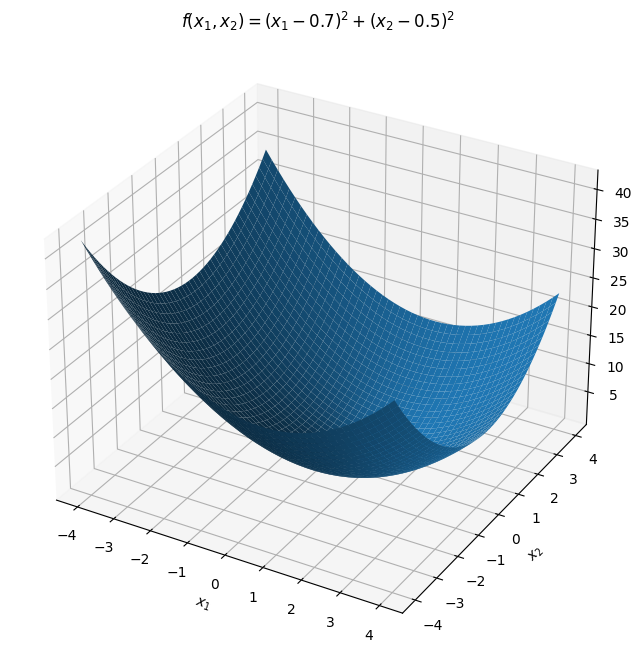

In [ ]:
x1_range = np.linspace(-4, 4)
x2_range = np.linspace(-4, 4)

def f1(x1: np.ndarray, x2: np.ndarray):
  return (x1-0.7)**2 + (x2 - 0.5)**2

plot_meshgrid(f1, x1_range, x2_range, "$f(x_1, x_2) = (x_1 - 0.7)^2 + (x_2 - 0.5)^2$")


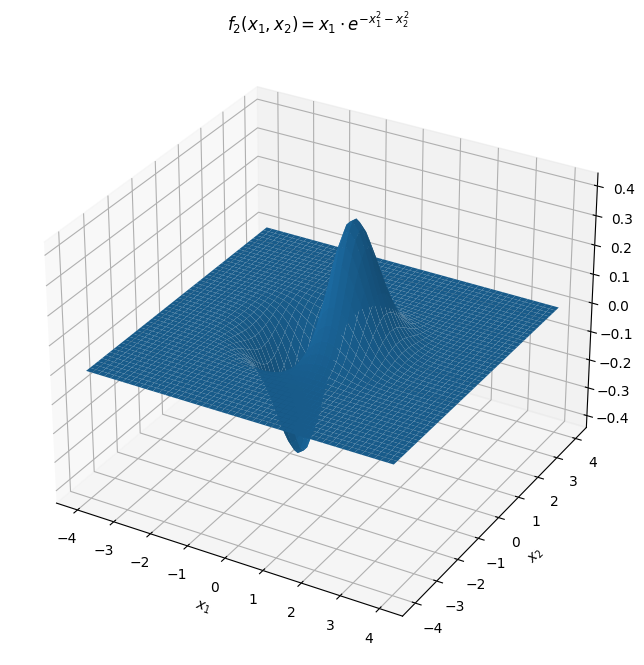

In [ ]:
x1_range = np.linspace(-4, 4)
x2_range = np.linspace(-4, 4)

def f2(x1: np.ndarray, x2: np.ndarray):
  return x1 * np.exp(-x1**2 - x2**2)

plot_meshgrid(f2, x1_range, x2_range, "$f_2(x_1, x_2) = x_1 \cdot e^{-x_1^2 - x_2^2}$")


### Ejercicio 2
Implemente el algoritmo del descenso del gradiente, para cada función.

a. Calcule paso a paso la derivada parcial.

1.   $\nabla f_1 = 
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1}\\ 
\frac{\partial f_1}{\partial x_2}
\end{bmatrix} =
\begin{bmatrix}
2x_1 - 1.4\\ 
2x_2 - 1
\end{bmatrix}$

$\frac{\partial f_1}{\partial x_1} = \frac{\partial \left[ (x_1 - 0.7)^2 + (x_2 - 0.5)^2 \right]}{\partial x_1}$ 

> $ \Rightarrow 2 \cdot (x_1 - 0.7) \cdot \frac{\partial (x_1 - 0.7)}{\partial x_1}$ 

> $ \Rightarrow 2 \cdot (x_1 - 0.7) \cdot 1$ 

> $ \Rightarrow 2x_1 - 1.4$


$\frac{\partial f_1}{\partial x_2} = \frac{\partial \left[ (x_1 - 0.7)^2 + (x_2 - 0.5)^2 \right]}{\partial x_2}$ 

> $ \Rightarrow 2 \cdot (x_2 - 0.5) \cdot \frac{\partial (x_2 - 0.5)}{\partial x_2}$ 

> $ \Rightarrow 2 \cdot (x_2 - 0.5) \cdot 1$ 

> $ \Rightarrow 2x_2 - 1$

---

2.    $\nabla f_2 = 
\begin{bmatrix}
\frac{\partial f_2}{\partial x_1}\\ 
\frac{\partial f_2}{\partial x_2}
\end{bmatrix} =
\begin{bmatrix}
e^{-x_1^2 - x_2^2} - 2 x_1^2 e^{-x_1^2 - x_2^2}\\ 
- 2 x_1 x_2 e^{-x_1^2 - x_2^2}
\end{bmatrix}$

$\frac{\partial f_2}{\partial x_1} = \frac{\partial \left[ x_1 e^{-x_1^2 - x_2^2} \right]}{\partial x_1}$

> $ \Rightarrow \frac{\partial (x_1)}{\partial x_1} \cdot e^{-x_1^2 - x_2^2} + \frac{\partial \left (e^{-x_1^2 - x_2^2} \right )}{\partial x_1} \cdot x_1$ 

> $ \Rightarrow 1 \cdot e^{-x_1^2 - x_2^2} + -2 x_1 e^{-x_1^2 - x_2^2} \cdot x_1$

> $ \Rightarrow e^{-x_1^2 - x_2^2} - 2 x_1^2 e^{-x_1^2 - x_2^2}$

$\frac{\partial f_2}{\partial x_2} = \frac{\partial \left[ x_1 e^{-x_1^2 - x_2^2} \right]}{\partial x_2}$

> $ \Rightarrow x_1 e^{-x_1^2 - x_2^2} \cdot \frac{\partial \left( -x_1^2 - x_2^2 \right)}{\partial x_2}$

> $ \Rightarrow -2 x_1 x_2 e^{-x_1^2 - x_2^2}$